# Assignment
Design & Develope : Negar Ariannia


# Medical Cost Dataset

## import

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing

In [94]:
df = pd.read_csv('D:\\iaaa\\tamrina\\tamrin_1\\insurance.csv')
df.shape

(1338, 7)

In [95]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

attributes sex , smoker and region are object so we have to convert them into float

binary values turned into 1 & 0 and region extended to 4 new columns .

In [98]:
dfc = df.copy()
dfc['sex'] = (dfc['sex'] == 'female').astype(int)
dfc['smoker'] = (dfc['smoker'] == 'yes').astype(int)
dfc_encoded = pd.get_dummies(dfc ,columns= ['region'])

I made a copy to use the actual data ,if needed

In [99]:
missing = df.isnull().sum()
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

none of the attributes have null value

In [100]:
dfc.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Scaling values between 0 and 1 to have the same effect.

In [101]:

scaler = MinMaxScaler()
scaler.fit(dfc_encoded)
dfc_encoded= scaler.transform(dfc_encoded)
data = pd.DataFrame(dfc_encoded, columns = ['age', 'sex', 'bmi', 'children', 'smoker',  'charges','region_northeast','region_northwest','region_southeast','region_southwest'])
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,1.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.0,0.403820,0.6,0.0,0.151299,0.0,1.0,0.0,0.0
1334,0.000000,1.0,0.429379,0.0,0.0,0.017305,1.0,0.0,0.0,0.0
1335,0.000000,1.0,0.562012,0.0,0.0,0.008108,0.0,0.0,1.0,0.0
1336,0.065217,1.0,0.264730,0.0,0.0,0.014144,0.0,0.0,0.0,1.0


## Exploratory Data Analysis (EDA)

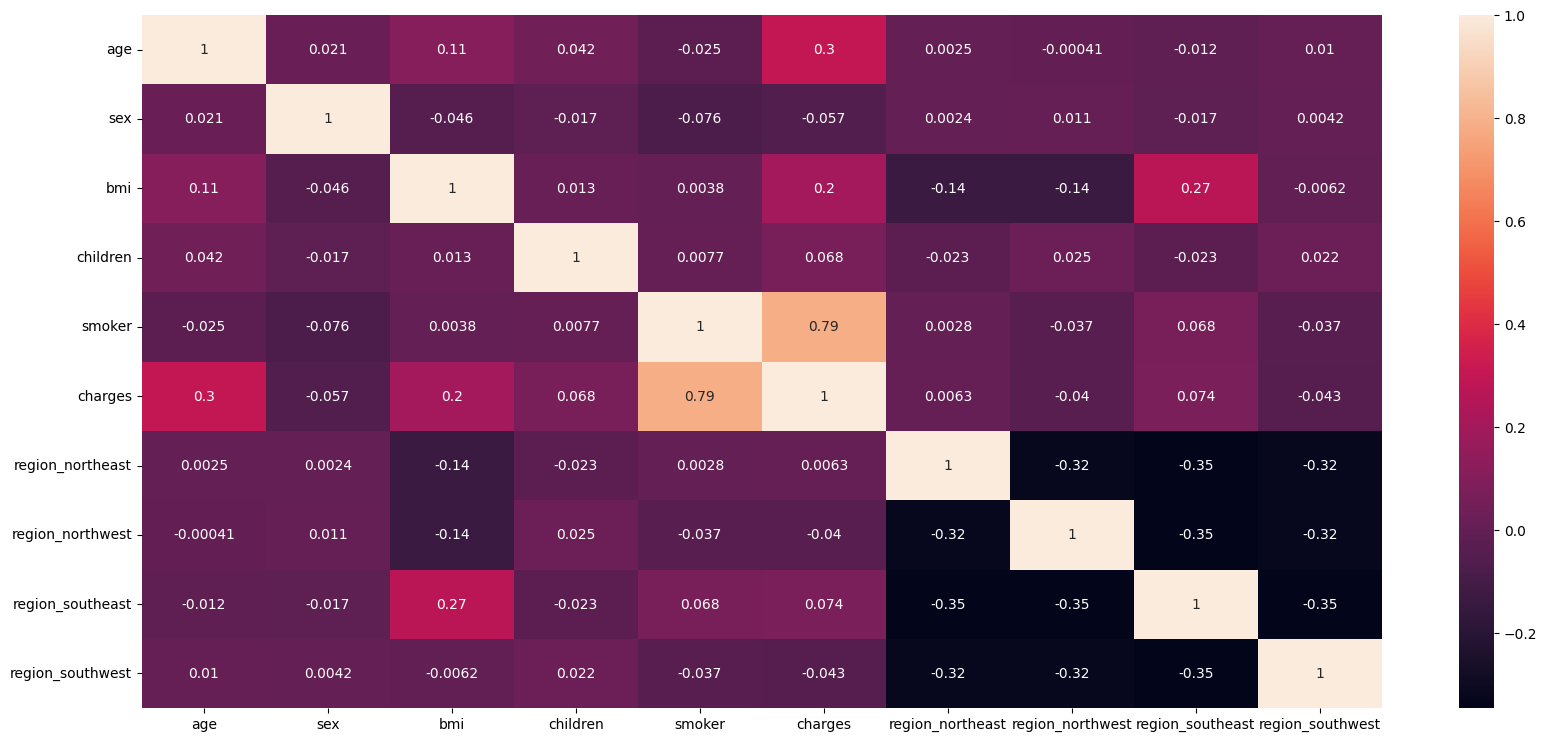

In [102]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)
plt.show()

sex and region have negative correlation with target so droping them might cause better accuracy.

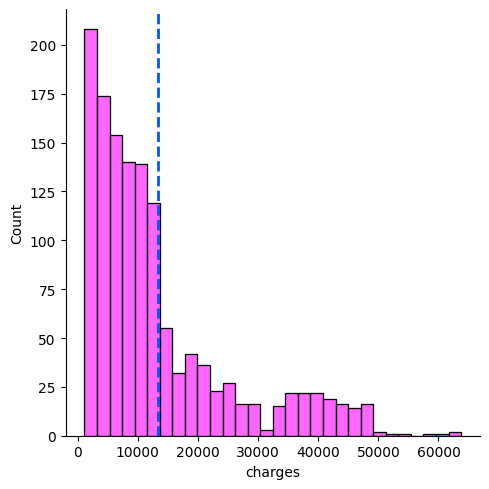

In [103]:
sns.displot(df['charges'], color='#ff33ff')
plt.axvline(x=df['charges'].mean(), color='#0055ff', linestyle='--', linewidth=2)
plt.show()

Medical costs are mostly between 0 and 10000 ,among thes people

In [104]:
px.histogram(data_frame=df,x='charges',color='sex',color_discrete_sequence=['#ff3399','#3399ff'])

In [105]:
y = data['charges']
x = data.drop(['charges'], axis= 1)

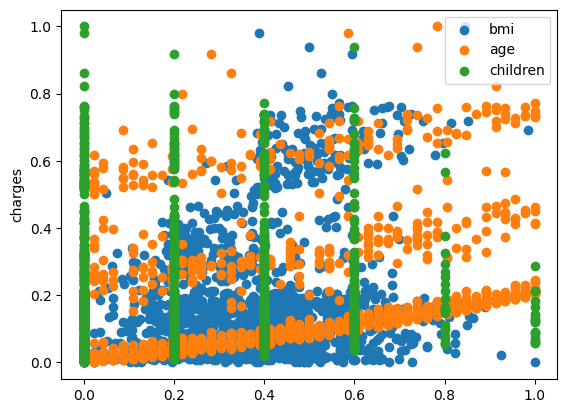

In [106]:
plt.scatter(x['bmi'],y , label = 'bmi')
plt.scatter(x['age'],y , label = 'age')
plt.scatter(x['children'],y , label = 'children')
plt.ylabel('charges')
plt.legend()
plt.show()


## Feature selection/engineering

In [107]:
data.columns
data_drop_region = data.drop(['region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest','sex'] ,axis=1)
data_drop_region

,age,bmi,children,smoker,charges
0,0.021739,0.321227,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,0.043816
...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,0.151299
1334,0.000000,0.429379,0.0,0.0,0.017305
1335,0.000000,0.562012,0.0,0.0,0.008108
1336,0.065217,0.264730,0.0,0.0,0.014144


## Model selection

In [108]:

y = data['charges']
x = data.drop(['charges'], axis= 1)

spliting data before droping region and sex

In [109]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,1.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.0,0.403820,0.6,0.0,0.0,1.0,0.0,0.0
1334,0.000000,1.0,0.429379,0.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,1.0,0.562012,0.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,1.0,0.264730,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
def train_model(model , train_x, test_x, train_y, test_y):

    model.fit(train_x , train_y )
    pred_y = model.predict(test_x)
    score = np.sqrt(mean_squared_error(test_y,pred_y))
    r2 = r2_score(test_y , pred_y)
    eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
    return eval_df

In [112]:
result = pd.DataFrame

In [113]:
model = LinearRegression()
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(test_y , pred_y)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['LinearRegression']
result = pd.DataFrame()
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\3499913565.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [114]:
result

,r2_score,mean_squared_error
LinearRegression,0.783575,0.092524


In [115]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(test_y , pred_y)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['DecisionTreeRegressor']
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\2884680753.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [116]:

model = RandomForestRegressor()
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(test_y , pred_y)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['RandomForestRegressor']
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\650833891.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [117]:
model = KNeighborsRegressor()
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(test_y , pred_y)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['KNeighborsRegressor1']
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\1860359940.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [118]:
result

,r2_score,mean_squared_error
LinearRegression,0.783575,0.092524
DecisionTreeRegressor,0.721693,0.104922
RandomForestRegressor,0.859702,0.074495
KNeighborsRegressor1,0.786020,0.092000


spliting data after droping region and sex

In [119]:
y2 = data['charges']
x2 = data_drop_region.drop(['charges'], axis= 1)
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

KNeighborsRegressor after droping sex and region

In [120]:
model = KNeighborsRegressor()
model.fit(train_x2 , train_y2 )
pred_y2 = model.predict(test_x2)
score = np.sqrt(mean_squared_error(test_y2,pred_y2))
r2 = r2_score(test_y2 , pred_y2)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['KNeighborsRegressor2']
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\1804283235.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Model evaluation

In [121]:
result

,r2_score,mean_squared_error
LinearRegression,0.783575,0.092524
DecisionTreeRegressor,0.721693,0.104922
RandomForestRegressor,0.859702,0.074495
KNeighborsRegressor1,0.786020,0.092000
KNeighborsRegressor2,0.864294,0.073266


In [122]:

models = result.T.columns.values
models

array(['LinearRegression', 'DecisionTreeRegressor',
       'RandomForestRegressor', 'KNeighborsRegressor1',
       'KNeighborsRegressor2'], dtype=object)

In [123]:
figure = px.bar(x=result.iloc[:5,0].values, y = models,orientation='h',color=result['r2_score'].iloc[:5],color_continuous_scale='tealrose',
            template="seaborn")
figure.update_layout(width=500, height=300,
                 xaxis=dict(title='r2_scores'),
                 yaxis=dict(title="Models"))
figure.show()

## Hyperparameter tuning:

In [124]:
error = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors= i)
    model.fit(train_x , train_y )
    pred_y = model.predict(test_x)
    error.append(np.mean(pred_y != test_y))

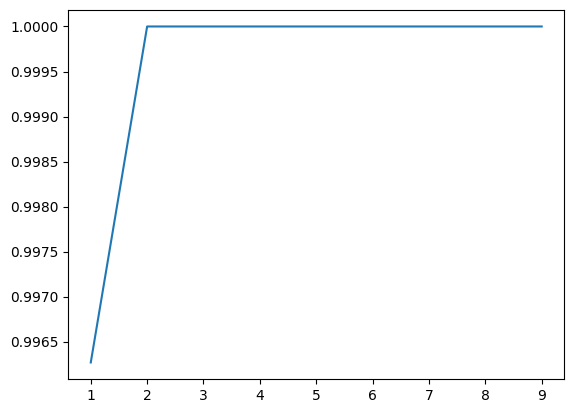

In [125]:
plt.plot(range(1,10) , error)
plt.show()

KNeighborsRegressor after tuning

In [126]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(test_y , pred_y)
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['KNeighborsRegressor3']
result = result.append(eval_df)

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\534815031.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [127]:

models = result.T.columns.values
result

,r2_score,mean_squared_error
LinearRegression,0.783575,0.092524
DecisionTreeRegressor,0.721693,0.104922
RandomForestRegressor,0.859702,0.074495
KNeighborsRegressor1,0.786020,0.092000
KNeighborsRegressor2,0.864294,0.073266
KNeighborsRegressor3,0.767339,0.095932


In [128]:
figure = px.bar(x=result.iloc[:6,0].values, y = models,orientation='h',color=result['r2_score'].iloc[:6],color_continuous_scale='tealrose',
            template="seaborn")
figure.update_layout(width=500, height=300,
                 xaxis=dict(title='r2_scores'),
                 yaxis=dict(title="Models"))
figure.show()

## Final model selection:

In [129]:

model = RandomForestRegressor()
model.fit(train_x , train_y )
pred_y = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred_y))
r2 = r2_score(pred_y, test_y )
eval_df = pd.DataFrame([[r2,score]], columns= ['r2_score', 'mean_squared_error'])
eval_df.index = ['RandomForestRegressor']
r2

0.8526204558677013

## Model interpretation

highest r2_score on this dataset was model trained by RandomForestRegressor 

droping region and sex only had better r2_score for model trained by KNeighborsRegressor

# Diabetes Dataset

## import


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score,precision_score, accuracy_score, recall_score, balanced_accuracy_score
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Data preprocessing

In [131]:
df = pd.read_csv('D:\\iaaa\\tamrina\\tamrin_1\\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
df.describe().T.style.background_gradient(sns.color_palette("flare" ,as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [133]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

data seems to have some important issues :
      1. min value of almost all attributes is zero , that means zero is substittute for null in some of them .
      2. the range of some attributes are large like Insulin which is between 0 and 849 ,while some other is small like DiabetesPedigreeFunction which is between 0 and 2 , we dont want insulin to effect more so we can normal their values by MinMaxScaler.

I will apply mean instead of zeros to have lower std and better performance.

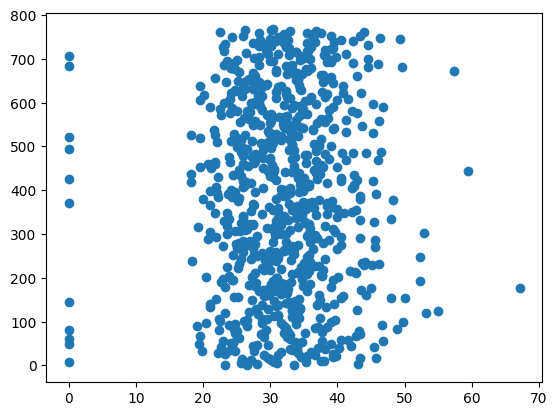

In [134]:
plt.scatter(df['BMI'] , range(0,768))
plt.show()

In [135]:
df['BMI'] = df['BMI'].apply(lambda x: 31.992578 if x == 0 else x )

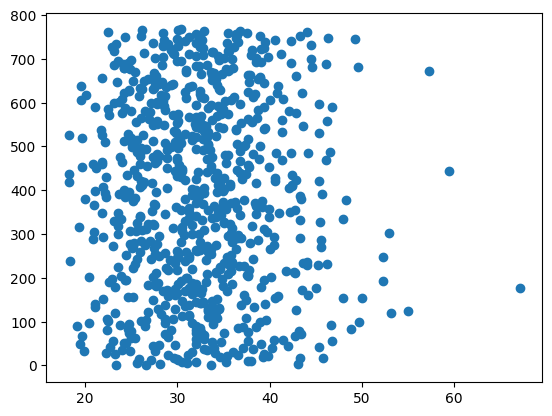

In [136]:
plt.scatter(df['BMI'] , range(0,768))
plt.show()

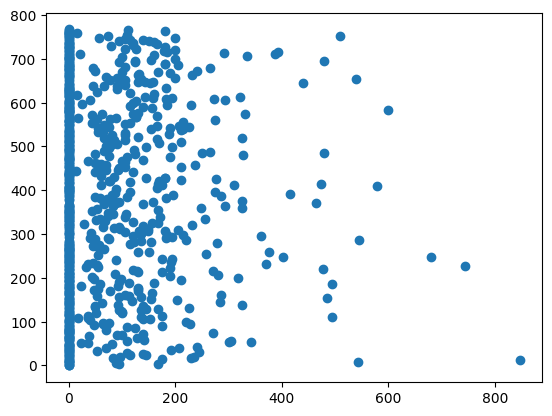

In [137]:
plt.scatter(df['Insulin'] , range(0,768))
plt.show()

In [138]:
df['Insulin'] = df['Insulin'].apply(lambda x: 119.173184 if x == 0 else x )

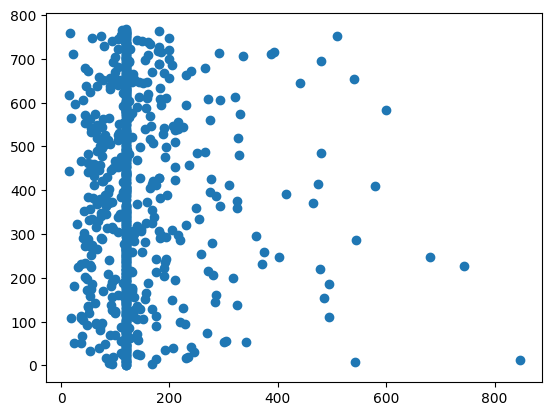

In [139]:
plt.scatter(df['Insulin'] , range(0,768))
plt.show()

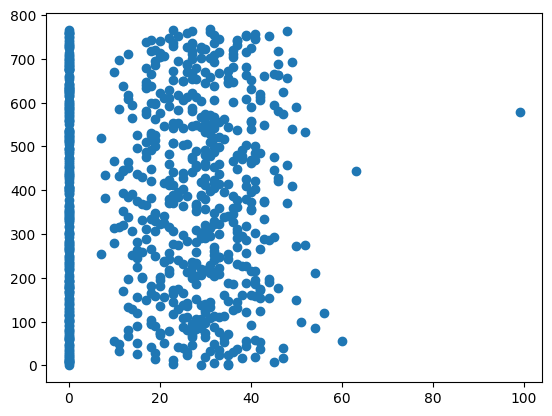

In [140]:
plt.scatter(df['SkinThickness'] , range(0,768))
plt.show()

In [141]:
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: 26.345052 if x > 70 or x == 0 else x )

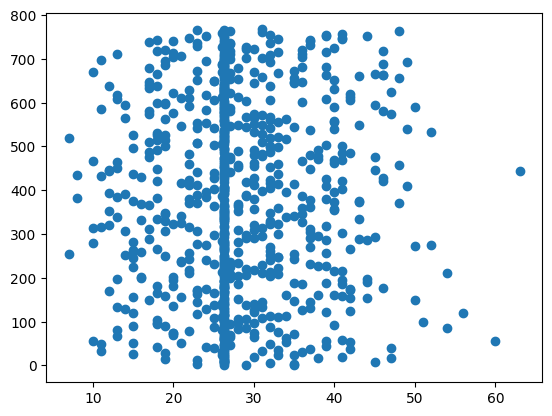

In [142]:
plt.scatter(df['SkinThickness'] , range(0,768))
plt.show()

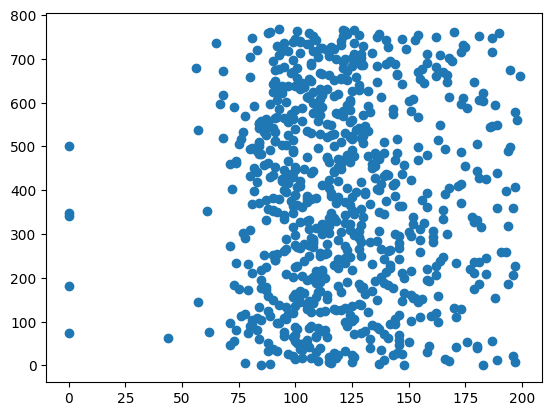

In [143]:
plt.scatter(df['Glucose'] , range(0,768))
plt.show()

In [144]:
df['Glucose'] = df['Glucose'].apply(lambda x: 120.894531 if x == 0 else x )

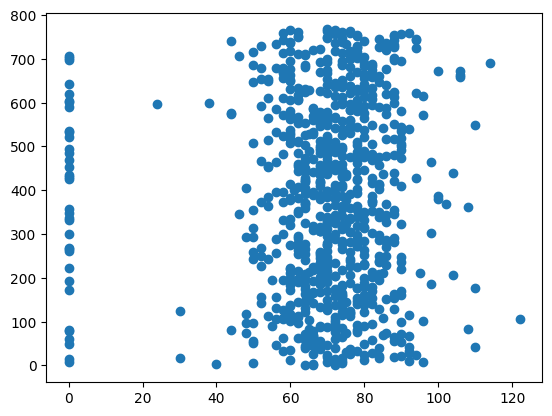

In [145]:
plt.scatter(df['BloodPressure'] , range(0,768))
plt.show()

In [146]:
df['BloodPressure'] = df['BloodPressure'].apply(lambda x: 69.105469 if x == 0 else x )

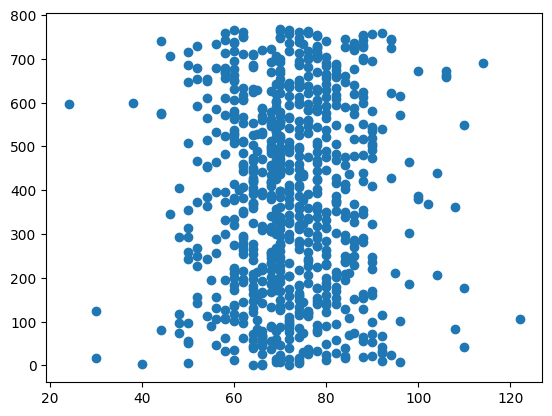

In [147]:
plt.scatter(df['BloodPressure'] , range(0,768))
plt.show()

In [148]:
df.describe().T.style.background_gradient(sns.color_palette("flare" ,as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,121.681605,30.436016,44.000000,99.750000,117.000000,140.250000,199.000000
BloodPressure,768.000000,72.254807,12.115932,24.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,28.228739,8.509315,7.000000,25.000000,26.345052,32.000000,63.000000
Insulin,768.000000,137.834337,86.945853,14.000000,119.173184,119.173184,127.250000,846.000000
BMI,768.000000,32.450805,6.875374,18.200000,27.500000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [149]:
columns = df.columns

In [150]:
dfc = df.copy()
scaler = MinMaxScaler()
scaler.fit(dfc)
dfc = scaler.transform(dfc)
dfc = pd.DataFrame(dfc , columns= columns)
dfc


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.500000,0.126410,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.392857,0.126410,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.345447,0.126410,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.732143,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.357143,0.126410,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.285714,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.345447,0.126410,0.243354,0.115713,0.433333,1.0


In [151]:
px.histogram(data_frame=dfc ,x=dfc.Outcome,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

data is not balanced so we use oversampling

In [152]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2)
data_r , lable_r = ros.fit_resample(dfc , dfc['Outcome'])
data_r

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.500000,0.126410,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.392857,0.126410,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.345447,0.126410,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
995,0.352941,0.664516,0.571429,0.345447,0.126410,0.231084,0.042699,0.483333,1.0
996,0.058824,0.374194,0.510204,0.345447,0.126410,0.435583,0.091802,0.350000,1.0
997,0.000000,0.877419,0.551020,1.000000,0.000000,0.842536,1.000000,0.066667,1.0
998,0.235294,0.903226,0.551020,0.571429,0.316106,0.384458,0.079419,0.166667,1.0


In [153]:
px.histogram(data_frame=data_r,x='Outcome',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

## Exploratory Data Analysis (EDA)

In [154]:
px.histogram(data_frame=df ,x=df.BloodPressure,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [155]:
px.histogram(data_frame=df ,x=df.Age,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

that means age between 20 and 30 mostly had negetive outcome for diabet

In [156]:
px.histogram(data_frame=df ,x='Glucose',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [157]:
px.histogram(data_frame=df ,x=df.BMI,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

we can see pink color (outcome = 1) is a little more on the right that means higher BMI can be a cause of diabets.

In [158]:
data_r.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.500000,0.126410,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.392857,0.126410,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.345447,0.126410,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000,1.0


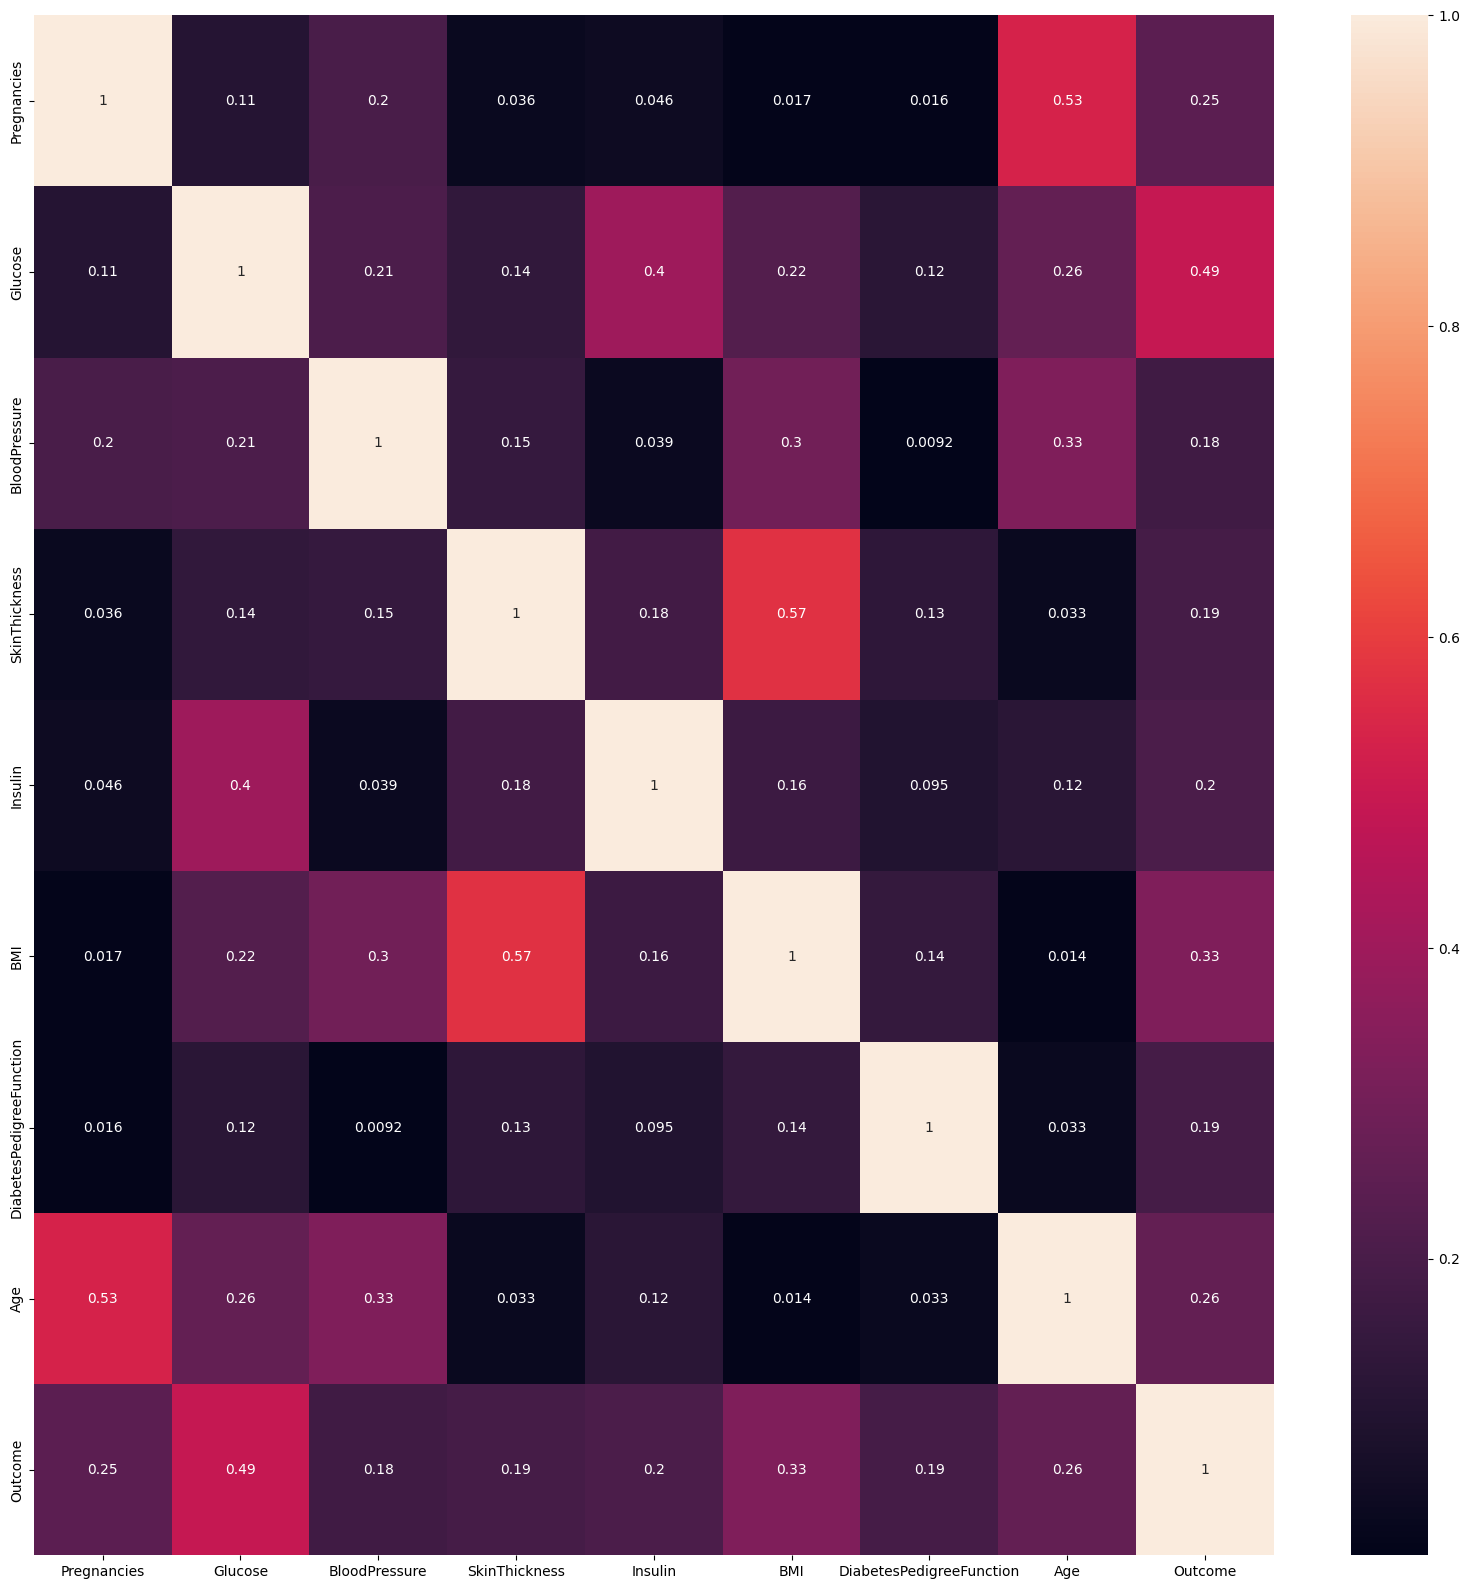

In [159]:
plt.figure(figsize=(20,20))
sns.heatmap(data_r.corr(),annot=True)
plt.show()

## Feature selection/engineering

the heatmap shows that glucose has the most correlation with outcome and none of attributes correlated with each other more than 0.5 so we wont drop any of them 


## Model selection

In [160]:
y = data_r['Outcome']
x = data_r.drop(['Outcome'], axis=1)

In [161]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,)

In [162]:
result = pd.DataFrame()

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
ar = pd.DataFrame([[accuracy,recall]] , columns = ['accuracy', 'recall'])
ar.index = ['LinearRegression']
result = result.append(ar)
result


C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\2565082749.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,accuracy,recall
LinearRegression,0.756,0.803419


In [164]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=58)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
ar = pd.DataFrame([[accuracy,recall]] , columns = ['accuracy', 'recall'])
ar.index = ['KNeighborsClassifier']
result = result.append(ar)
result

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\2872203464.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,accuracy,recall
LinearRegression,0.756,0.803419
KNeighborsClassifier,0.708,0.777778


In [165]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
ar = pd.DataFrame([[accuracy,recall]] , columns = ['accuracy', 'recall'])
ar.index = ['DecisionTreeClassifier']
result = result.append(ar)
result

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\143274887.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,accuracy,recall
LinearRegression,0.756,0.803419
KNeighborsClassifier,0.708,0.777778
DecisionTreeClassifier,0.804,0.846154


In [166]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=58)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
ar = pd.DataFrame([[accuracy,recall]] , columns = ['accuracy', 'recall'])
ar.index = ['RandomForestClassifier']
result = result.append(ar)
result

C:\Users\Toranj\AppData\Local\Temp\ipykernel_17192\3613340320.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,accuracy,recall
LinearRegression,0.756,0.803419
KNeighborsClassifier,0.708,0.777778
DecisionTreeClassifier,0.804,0.846154
RandomForestClassifier,0.832,0.880342


results after oversampling and MinMaxScaler and fixing the zero value problem :
                        accuracy	recall
LinearRegression     	0.644	    0.568
KNeighborsClassifier	0.644	    0.608
DecisionTreeClassifier	0.864	    0.896
RandomForestClassifier	0.864	    0.912


 
 results after oversampling and MinMaxScaler but not fixing the zero value problem :
                        accuracy	recall
LinearRegression	    0.776	    0.782258
KNeighborsClassifier	0.740	    0.701613
DecisionTreeClassifier	0.820	    0.814516
RandomForestClassifier	0.844	    0.854839


## Model evaluation

In [167]:

models = result.T.columns.values
models

array(['LinearRegression', 'KNeighborsClassifier',
       'DecisionTreeClassifier', 'RandomForestClassifier'], dtype=object)

In [168]:
figure = px.bar(x=result.iloc[:4,0].values, y = models,orientation='h',color=result['accuracy'].iloc[:5],color_continuous_scale='tealrose',template="seaborn")
figure.update_layout(width=500, height=300,xaxis=dict(title='accuracy'),yaxis=dict(title="Models"))
figure.show()

## Hyperparameter tuning

In [169]:
acc = []
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(x_train , y_train )
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    acc.append(accuracy)

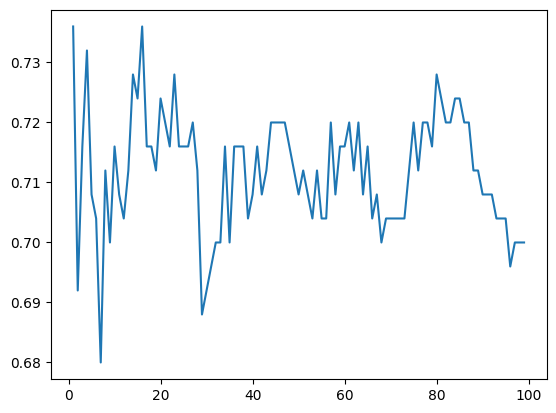

In [170]:
plt.plot(range(1,100) , acc)
plt.show()

In [171]:
acc = []
for i in range(1,30):
    model = RandomForestClassifier(n_estimators = i)
    model.fit(x_train , y_train )
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    acc.append(accuracy)

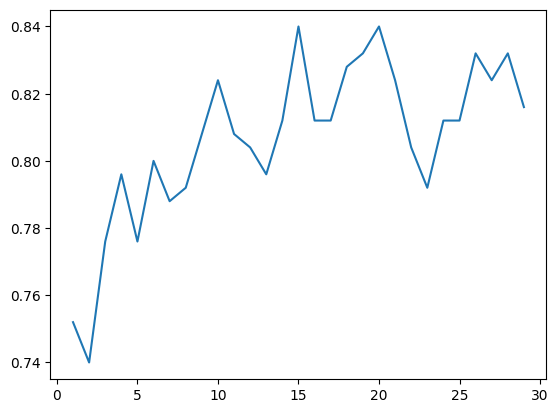

In [172]:
plt.plot(range(1,30) , acc)
plt.show()

##  Final model selection

RandomForestClassifier had the best performance 

In [195]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=58)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
ar = pd.DataFrame([[accuracy,recall]] , columns = ['accuracy', 'recall'])
ar.index = ['RandomForestClassifier']
ar


,accuracy,recall
RandomForestClassifier,0.832,0.871795


## Model interpretation

three changes has been applied to the data :
1.zero values has been replaced with mean
2.data has been scaled
3.OverSampling to balance the dataset